In [1]:
!pip install nltk pandas gunicorn
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

zsh:1: command not found: pip


In [2]:
sentidata = pd.read_csv("./NewAPL6.csv")
# sentidata = sentidata.drop(["Unnamed: 0"],axis=1)
sentidata = sentidata.dropna(axis = 0, how='any')
sentidata.shape
sentidata.head()

,text,sentiValue,label
0,uh born downtown los angeles,-0.004808,0
1,love l_a love traffic four five love beach liv...,0.118506,1
2,uh guess visiting family destination,-0.050781,0
3,uh last flew cedar rapid visit friend,0.045556,1
4,couple week im flying back,-0.018750,0


In [3]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.4
4.8


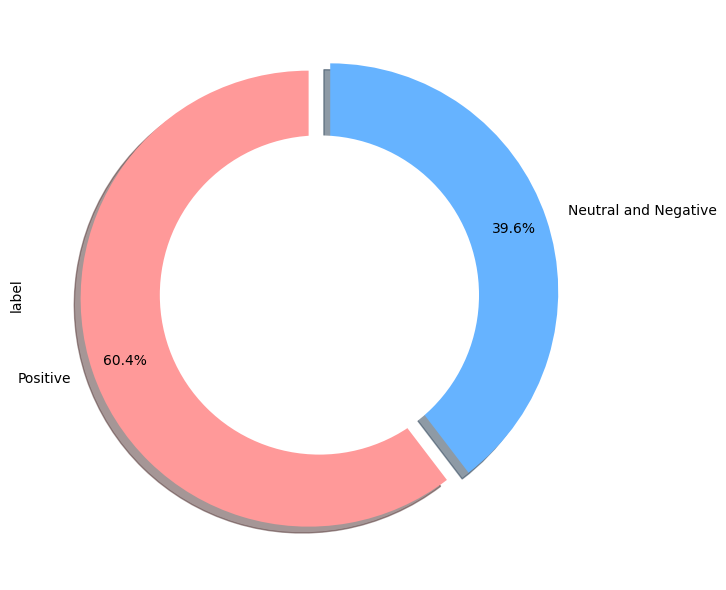

In [4]:
explode = [0.05,0.05]
labels = ['Positive','Neutral and Negative']
colors = ['#ff9999','#66b3ff']
sentidata.label.value_counts().plot(kind='pie', autopct='%1.1f%%',shadow = True,explode = explode, labels = labels,colors = colors, startangle = 90, pctdistance = 0.85)

centre_circle = plt.Circle((0,0),0.70,fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

plt.show()

In [5]:
features = sentidata.iloc[:, 0].values
labels = sentidata.iloc[:, 2].values


In [6]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
# processed_features

In [7]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/surajl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
import pickle
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
# vectorizer = TfidfVectorizer()
# vectorizer = vectorizer.fit(processed_features)
processed_features = vectorizer.fit_transform(features).toarray()
# print(vectorizer.vocabulary_)
print(vectorizer.vocabulary_["little"])
print(vectorizer.vocabulary_["um"])
print(vectorizer.vocabulary_["mad"])
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))


485
884
506


In [9]:
for i in range(len(processed_features[0])):
    print(processed_features[0][i],end=", ")

0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5559845205225937, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5848082098335485, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.33, random_state=42)
X_train.shape

(4722, 965)

In [11]:
X_test.shape

(2326, 965)

In [12]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=250, random_state=100).fit(X_train, y_train)

In [13]:
predictions = text_classifier.predict(X_test)

In [14]:
# print(X_train.shape)
!pip install pickle-mixin
import pickle

zsh:1: command not found: pip


In [15]:
pickle.dump(text_classifier,open('model.pkl','wb'))

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 650  285]
 [ 243 1148]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       935
           1       0.80      0.83      0.81      1391

    accuracy                           0.77      2326
   macro avg       0.76      0.76      0.76      2326
weighted avg       0.77      0.77      0.77      2326

0.7730008598452278


In [17]:
fp = pd.read_csv("./input.csv")
# fp = fp.dropna(axis = 0,how = 'any')
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    text = re.sub(r'[^\w\s]','',str(text).lower().strip())
    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]
    if flg_stemm==True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
    if flg_lemm==True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
    text = " ".join(lst_text)
    return text


# sentidata = pd.read_csv("./NewAPL2.csv")
fp = fp.dropna(axis = 0, how='any')
lst_stopwords = nltk.corpus.stopwords.words("english")
fp["cleaned"] = fp["testdata"].apply(lambda x: utils_preprocess_text(x,flg_stemm=False,flg_lemm=True,))
fp.to_csv("input.csv",index=False)

# prF = []

# for line in range(0,len(inps)):
#     # Remove all the special characters
#     pF1 = re.sub(r'\W', ' ', str(inps[line]))

#     # remove all single characters
#     pF1= re.sub(r'\s+[a-zA-Z]\s+', ' ', pF1)

#     # Remove single characters from the start
#     pF1 = re.sub(r'\^[a-zA-Z]\s+', ' ', pF1) 

#     # Substituting multiple spaces with single space
#     pF1 = re.sub(r'\s+', ' ', pF1, flags=re.I)

#     # Removing prefixed 'b'
#     pF1 = re.sub(r'^b\s+', '', pF1)

#     # Converting to Lowercase
#     pF1 = pF1.lower()

#     prF.append(pF1)

# prF


KeyError: 'testdata'

In [ ]:
fp = pd.read_csv("./input.csv")
inps = fp.iloc[:, 1].values


In [ ]:
prF = vectorizer.transform(inps)
prF.shape

In [ ]:
pred = text_classifier.predict(prF)


In [ ]:
print(pred)

In [ ]:
fp